In [1]:
import numpy

from flow.core.params import SumoParams, EnvParams, \
    NetParams, InitialConfig, InFlows, SumoCarFollowingParams
from flow.core.params import VehicleParams
from flow.controllers import IDMController
from flow.envs.merge import MergePOEnv, ADDITIONAL_ENV_PARAMS
from flow.networks import MergeNetwork

from flow.core.experiment import Experiment

In [2]:
def make_merge_flow_params(main_line_flow=2000,
                           on_ramp_flow=100,
                           cfm_controller=(IDMController,{"noise": 0.05})):
    
    vehicles = VehicleParams()
    vehicles.add(
        veh_id="human",
        acceleration_controller=cfm_controller,
        car_following_params=SumoCarFollowingParams(
            speed_mode="obey_safe_speed",
        ),
        num_vehicles=5)

    inflow = InFlows()
    inflow.add(
        veh_type="human",
        edge="inflow_highway",
        vehs_per_hour=main_line_flow,
        departLane="free",
        departSpeed=10)
    inflow.add(
        veh_type="human",
        edge="inflow_merge",
        vehs_per_hour=on_ramp_flow,
        departLane="free",
        departSpeed=7.5)


    flow_params = dict(
        # name of the experiment
        exp_tag='merge-baseline',

        # name of the flow environment the experiment is running on
        env_name=MergePOEnv,

        # name of the network class the experiment is running on
        network=MergeNetwork,

        # simulator that is used by the experiment
        simulator='traci',

        # sumo-related parameters (see flow.core.params.SumoParams)
        sim=SumoParams(
            render=True,
            emission_path="./data/",
            sim_step=0.1,
            restart_instance=False,
        ),

        # environment related parameters (see flow.core.params.EnvParams)
        env=EnvParams(
            horizon=2000,
            additional_params=ADDITIONAL_ENV_PARAMS,
            sims_per_step=5,
            warmup_steps=0,
        ),

        # network-related parameters (see flow.core.params.NetParams and the
        # network's documentation or ADDITIONAL_NET_PARAMS component)
        net=NetParams(
            inflows=inflow,
            additional_params={
                "merge_length": 100,
                "pre_merge_length": 1000,
                "post_merge_length": 100,
                "merge_lanes": 1,
                "highway_lanes": 1,
                "speed_limit": 30,
            },
        ),

        # vehicles to be placed in the network at the start of a rollout (see
        # flow.core.params.VehicleParams)
        veh=vehicles,

        # parameters specifying the positioning of vehicles upon initialization/
        # reset (see flow.core.params.InitialConfig)
        initial=InitialConfig(
            spacing="uniform",
            perturbation=5.0,
        ),
    )

    
    return flow_params

def run_sim(flow_params):
    exp = Experiment(flow_params, None)
    exp.run(1, convert_to_csv=True)
    print('Simulation finished.')

In [3]:
flow_params = make_merge_flow_params()
run_sim(flow_params)

/Users/vanderbilt/Desktop/General_research_tools/flow/flow/utils/flow_warnings.py:26: PendingDeprecationWarning: The attribute departLane in InFlows is deprecated, use depart_lane instead.
  PendingDeprecationWarning
/Users/vanderbilt/Desktop/General_research_tools/flow/flow/utils/flow_warnings.py:26: PendingDeprecationWarning: The attribute departSpeed in InFlows is deprecated, use depart_speed instead.
  PendingDeprecationWarning
/Users/vanderbilt/Desktop/General_research_tools/flow/flow/utils/flow_warnings.py:26: PendingDeprecationWarning: The attribute departLane in InFlows is deprecated, use depart_lane instead.
  PendingDeprecationWarning
/Users/vanderbilt/Desktop/General_research_tools/flow/flow/utils/flow_warnings.py:26: PendingDeprecationWarning: The attribute departSpeed in InFlows is deprecated, use depart_speed instead.
  PendingDeprecationWarning


**********************************************************
**********************************************************
**********************************************************
significantly decrease after large number of rollouts. In 
order to avoid this, set SumoParams(restart_instance=True).
**********************************************************
**********************************************************
**********************************************************


FatalTraCIError: connection closed by SUMO

In [11]:
from importlib import reload
import sim_processing
reload(sim_processing)

from sim_processing import get_vehicle_data

In [39]:
csv_path = './data/merge-baseline_20230404-1420431680636043.2358332-0_emission.csv'

# longer sim:
csv_path = './data/merge-baseline_20230404-1517591680639479.69695-0_emission.csv'

vehicle_data = get_vehicle_data(csv_path=csv_path)

Data loaded, total time: 3.397773027420044


In [29]:
import numpy as np
def get_traj_data(vehicle_data_list):
    t = []
    x = []
    v = []
    
    for row in vehicle_data_list:
        edge = row[13]
        if(edge == 'left'):
            t.append(float(row[0]))
            x.append(float(row[2]))
            v.append(float(row[4]))
            
    return np.array([t,x,v])



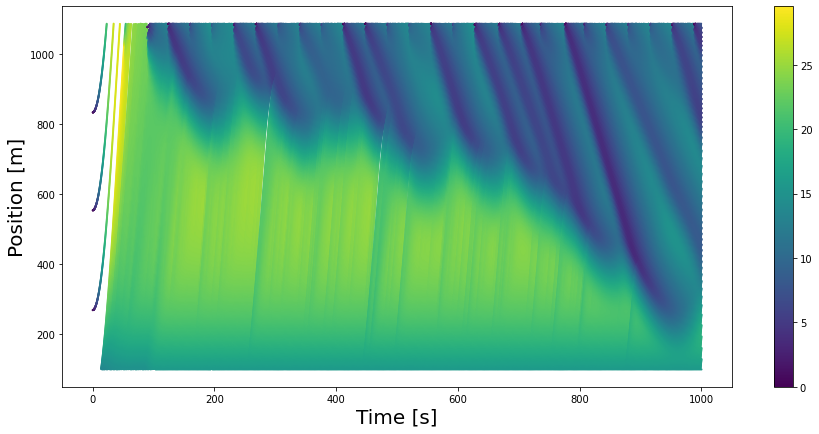

In [41]:
def plot_spacetime(vehicle_data):
    times = []
    positions = []
    speeds = []
    
    for veh_id in vehicle_data:
        traj_data = get_traj_data(vehicle_data[veh_id])
        t = traj_data[0]
        x = traj_data[1]
        v = traj_data[2]
        for i in range(len(t)):
            times.append(t[i])
            positions.append(x[i])
            speeds.append(v[i])
    
    plt.figure(figsize=[15,7])
    plt.scatter(times,positions,c=speeds,s=1.0)
    plt.colorbar()
    plt.ylabel('Position [m]',fontsize=20)
    plt.xlabel('Time [s]',fontsize=20)
    
plot_spacetime(vehicle_data)

In [36]:
flow_params = make_merge_flow_params(main_line_flow=500)
run_sim(flow_params)

/Users/vanderbilt/Desktop/General research tools/flow/flow/utils/flow_warnings.py:26: PendingDeprecationWarning: The attribute departLane in InFlows is deprecated, use depart_lane instead.
  PendingDeprecationWarning
/Users/vanderbilt/Desktop/General research tools/flow/flow/utils/flow_warnings.py:26: PendingDeprecationWarning: The attribute departSpeed in InFlows is deprecated, use depart_speed instead.
  PendingDeprecationWarning
/Users/vanderbilt/Desktop/General research tools/flow/flow/utils/flow_warnings.py:26: PendingDeprecationWarning: The attribute departLane in InFlows is deprecated, use depart_lane instead.
  PendingDeprecationWarning
/Users/vanderbilt/Desktop/General research tools/flow/flow/utils/flow_warnings.py:26: PendingDeprecationWarning: The attribute departSpeed in InFlows is deprecated, use depart_speed instead.
  PendingDeprecationWarning


**********************************************************
**********************************************************
**********************************************************
significantly decrease after large number of rollouts. In 
order to avoid this, set SumoParams(restart_instance=True).
**********************************************************
**********************************************************
**********************************************************
Round 0, return: 1508.3863679129797
./data/merge-baseline_20230404-1527141680640034.327551-0_emission.csv ./data/
Average, std returns: 1508.3863679129797, 0.0
Average, std velocities: 23.1160657602641, 0.0
Average, std outflows: 597.6, 0.0
Total time: 28.019444227218628
steps/second: 108.77619305993602
Simulation finished.


Data loaded, total time: 0.8551788330078125


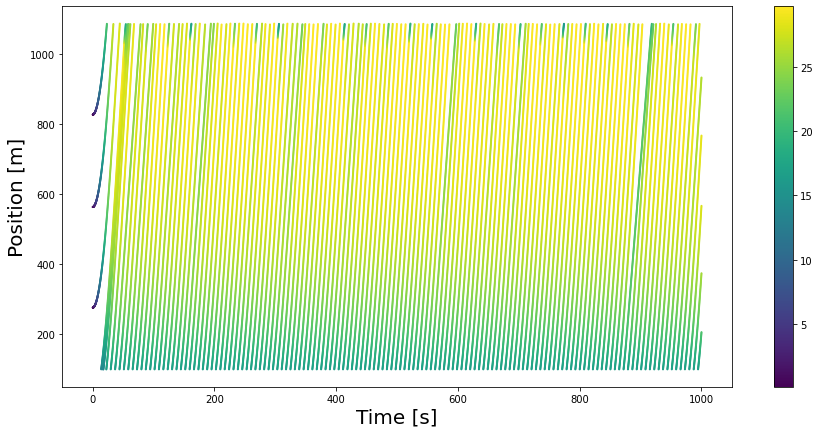

In [42]:
csv_path = './data/merge-baseline_20230404-1527141680640034.327551-0_emission.csv'

vehicle_data = get_vehicle_data(csv_path=csv_path)

plot_spacetime(vehicle_data)

In [43]:
cfm_controller = (IDMController,{"T":2.0,"noise": 0.05})

flow_params = make_merge_flow_params(cfm_controller=cfm_controller)

run_sim(flow_params)

/Users/vanderbilt/Desktop/General research tools/flow/flow/utils/flow_warnings.py:26: PendingDeprecationWarning: The attribute departLane in InFlows is deprecated, use depart_lane instead.
  PendingDeprecationWarning
/Users/vanderbilt/Desktop/General research tools/flow/flow/utils/flow_warnings.py:26: PendingDeprecationWarning: The attribute departSpeed in InFlows is deprecated, use depart_speed instead.
  PendingDeprecationWarning
/Users/vanderbilt/Desktop/General research tools/flow/flow/utils/flow_warnings.py:26: PendingDeprecationWarning: The attribute departLane in InFlows is deprecated, use depart_lane instead.
  PendingDeprecationWarning
/Users/vanderbilt/Desktop/General research tools/flow/flow/utils/flow_warnings.py:26: PendingDeprecationWarning: The attribute departSpeed in InFlows is deprecated, use depart_speed instead.
  PendingDeprecationWarning


**********************************************************
**********************************************************
**********************************************************
significantly decrease after large number of rollouts. In 
order to avoid this, set SumoParams(restart_instance=True).
**********************************************************
**********************************************************
**********************************************************
Round 0, return: 1241.2803706527895
./data/merge-baseline_20230404-1538271680640707.3223848-0_emission.csv ./data/
Average, std returns: 1241.2803706527895, 0.0
Average, std velocities: 16.91692533412219, 0.0
Average, std outflows: 1454.4, 0.0
Total time: 73.40572690963745
steps/second: 35.779073059920904
Simulation finished.


Data loaded, total time: 1.917823076248169


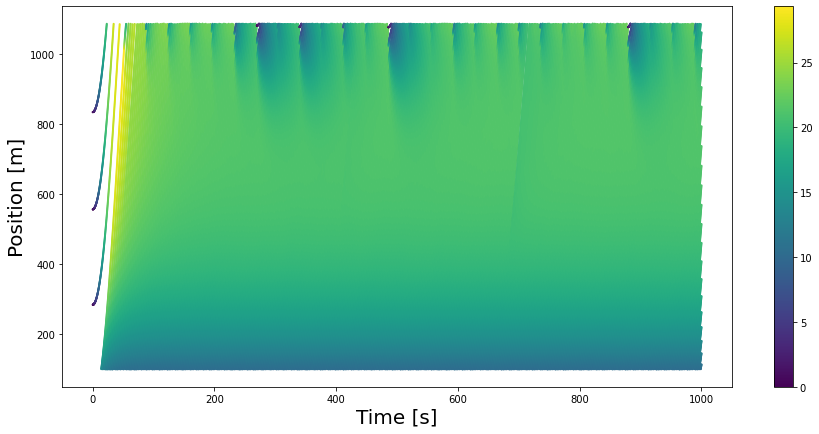

In [44]:
def plot_space_time_from_csv(csv_path):
    vehicle_data = get_vehicle_data(csv_path=csv_path)
    plot_spacetime(vehicle_data)
    
plot_space_time_from_csv(csv_path='./data/merge-baseline_20230404-1538271680640707.3223848-0_emission.csv')

In [45]:
cfm_controller = (IDMController,{"T":2.0,"noise": 0.05})

on_ramp_flow = 400

flow_params = make_merge_flow_params(cfm_controller=cfm_controller,
                                    on_ramp_flow=on_ramp_flow)

run_sim(flow_params)

/Users/vanderbilt/Desktop/General research tools/flow/flow/utils/flow_warnings.py:26: PendingDeprecationWarning: The attribute departLane in InFlows is deprecated, use depart_lane instead.
  PendingDeprecationWarning
/Users/vanderbilt/Desktop/General research tools/flow/flow/utils/flow_warnings.py:26: PendingDeprecationWarning: The attribute departSpeed in InFlows is deprecated, use depart_speed instead.
  PendingDeprecationWarning
/Users/vanderbilt/Desktop/General research tools/flow/flow/utils/flow_warnings.py:26: PendingDeprecationWarning: The attribute departLane in InFlows is deprecated, use depart_lane instead.
  PendingDeprecationWarning
/Users/vanderbilt/Desktop/General research tools/flow/flow/utils/flow_warnings.py:26: PendingDeprecationWarning: The attribute departSpeed in InFlows is deprecated, use depart_speed instead.
  PendingDeprecationWarning


**********************************************************
**********************************************************
**********************************************************
significantly decrease after large number of rollouts. In 
order to avoid this, set SumoParams(restart_instance=True).
**********************************************************
**********************************************************
**********************************************************
Round 0, return: 592.5976162915346
./data/merge-baseline_20230404-1547021680641222.1512132-0_emission.csv ./data/
Average, std returns: 592.5976162915346, 0.0
Average, std velocities: 7.992172233274281, 0.0
Average, std outflows: 1360.8, 0.0
Total time: 163.79530787467957
steps/second: 19.150385491098056
Simulation finished.


In [47]:
cfm_controller = (IDMController,{"T":2.0,"noise": 0.05})

on_ramp_flow = 400

main_line_flow=1600


flow_params = make_merge_flow_params(cfm_controller=cfm_controller,
                                    on_ramp_flow=on_ramp_flow,
                                    main_line_flow=main_line_flow)

run_sim(flow_params)

/Users/vanderbilt/Desktop/General research tools/flow/flow/utils/flow_warnings.py:26: PendingDeprecationWarning: The attribute departLane in InFlows is deprecated, use depart_lane instead.
  PendingDeprecationWarning
/Users/vanderbilt/Desktop/General research tools/flow/flow/utils/flow_warnings.py:26: PendingDeprecationWarning: The attribute departSpeed in InFlows is deprecated, use depart_speed instead.
  PendingDeprecationWarning
/Users/vanderbilt/Desktop/General research tools/flow/flow/utils/flow_warnings.py:26: PendingDeprecationWarning: The attribute departLane in InFlows is deprecated, use depart_lane instead.
  PendingDeprecationWarning
/Users/vanderbilt/Desktop/General research tools/flow/flow/utils/flow_warnings.py:26: PendingDeprecationWarning: The attribute departSpeed in InFlows is deprecated, use depart_speed instead.
  PendingDeprecationWarning


**********************************************************
**********************************************************
**********************************************************
significantly decrease after large number of rollouts. In 
order to avoid this, set SumoParams(restart_instance=True).
**********************************************************
**********************************************************
**********************************************************
Round 0, return: 575.294432699374
./data/merge-baseline_20230404-1551471680641507.409816-0_emission.csv ./data/
Average, std returns: 575.294432699374, 0.0
Average, std velocities: 7.7569061630109974, 0.0
Average, std outflows: 1360.8, 0.0
Total time: 166.77777314186096
steps/second: 18.71639515451338
Simulation finished.


In [65]:
def make_filter_input_data(vehicle_data,t_range=[0.0,np.inf],x_range=[0.0,np.inf]):
    times_list = []
    positions_list = []
    speeds_list = []
    
    t_min = t_range[0]
    t_max = t_range[1]
    
    x_min = x_range[0]
    x_max = x_range[1]
    
    
    
    for veh_id in vehicle_data:
        traj_data = get_traj_data(vehicle_data[veh_id])
        t = traj_data[0]
        x = traj_data[1]
        v = traj_data[2]
        
        
        in_time_range = np.logical_and(t>t_min,t<t_max)

        in_space_range = np.logical_and(x>x_min,x<x_max)

        in_range = np.logical_and(in_time_range,in_space_range)

        t = t[in_range]
        x = x[in_range]
        v = v[in_range]

        if(len(t) > 0):      
            times_list.append(t)
            positions_list.append(x)
            speeds_list.append(v)
        
    return times_list,positions_list,speeds_list


Done.


In [108]:
reload(sim_processing)
from sim_processing import get_gaussian_kernel_filter

csv_path = './data/merge-baseline_20230404-1517591680639479.69695-0_emission.csv'


vehicle_data = get_vehicle_data(csv_path=csv_path)

times_list,positions_list,speeds_list = make_filter_input_data(vehicle_data,
                                                               t_range=[600.0,1000.0],
                                                               x_range=[0.0,1000.0])


MRho,MQ = get_gaussian_kernel_filter(times_list,positions_list,speeds_list)

Data loaded, total time: 6.123267889022827


100%|██████████| 256/256 [02:34<00:00,  1.65it/s]


In [132]:
MV = np.divide(MQ,MRho)

Text(0.5, 1.0, 'Flow rate [veh/hr]')

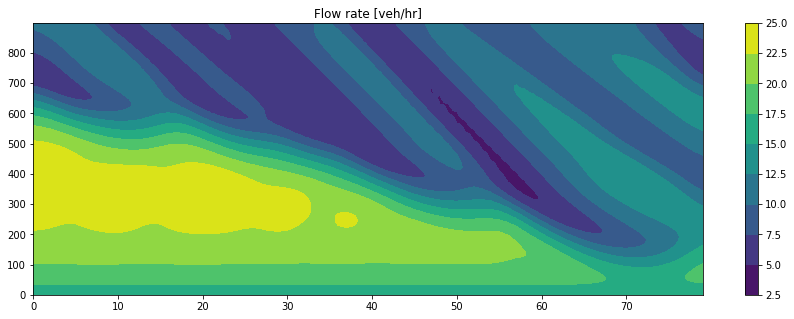

In [133]:
plt.figure(figsize=[15,5])
plt.contourf(MV)
plt.colorbar()
plt.title('Flow rate [veh/hr]')

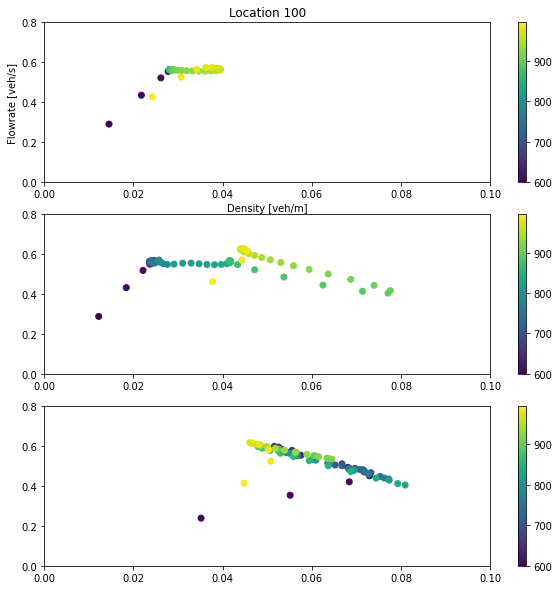

In [131]:
t_begin = 600.0
t_end = 1000.0

mt = np.arange(t_begin,t_end,5.0)

plt.figure(figsize=[10,10])

plt.subplot(3,1,1)
plt.scatter(MRho[100,:],MQ[100,:],c=mt)
plt.ylim([0.0,0.8])
plt.xlim([0.0,0.10])
plt.colorbar()
plt.ylabel('Flowrate [veh/s]')
plt.xlabel('Density [veh/m]')
plt.title('Location 100')

plt.subplot(3,1,2)
plt.scatter(MRho[300,:],MQ[300,:],c=mt)
plt.ylim([0.0,0.8])
plt.xlim([0.0,0.10])
plt.colorbar()

plt.subplot(3,1,3)
plt.scatter(MRho[700,:],MQ[700,:],c=mt)
plt.ylim([0.0,0.8])
plt.xlim([0.0,0.10])
plt.colorbar()
plt.ylabel('Flowrate [veh/s]')
plt.xlabel('Density [veh/m]')
plt.title('Location 700')

In [166]:
def IDM_Accel(p,s,ds,v):
    
    # p = [a,b,v_max,delta,T,s0]
    
    a = p[0]
    b = p[1]
    v_max = p[2]
    delta = p[3]
    T = p[4]
    s0 = p[5]
    
    
    term_1 = np.power((v/v_max),delta) #(v/v_max)^delta
    
    s_star = T*v + np.multiply(v,(-ds))/(2*np.sqrt(a*b))
    
    term_2 = np.square(np.divide(s0 + np.max([s_star,np.zeros_like(s_star)]),s))
    
    dv_dt = a*(1.0 - term_1 - term_2)
    
    return dv_dt

def IDM_S_eq(p,v):
    s_eq = np.divide((p[5]+p[4]*v),np.sqrt(1-np.power(v/p[2],p[3])))
    return s_eq
    
def get_idm_stability_regions(idm_params,v_range):
    a=idm_params[0]
    b=idm_params[1]
    V0=idm_params[2]
    delta=idm_params[3]
    T=idm_params[4]
    s0=idm_params[5]

    s_eq_vals = np.zeros_like(v_range)
    
    for i in range(len(v_range)):
        v = v_range[i]
        s_eq = IDM_S_eq(idm_params,v)
        s_eq_vals[i] = s_eq
    
    s = s_eq_vals
    v = v_range
    
    # finite difference derivative:
    ep = 1e-6
    da_ds = (IDM_Accel(idm_params,s+ep,0,v)-IDM_Accel(idm_params,s-ep,0,v))/(2*ep)
    da_dds = (IDM_Accel(idm_params,s,ep,v)-IDM_Accel(idm_params,s,-ep,v))/(2*ep)
    da_dv = (IDM_Accel(idm_params,s,0,v+ep)-IDM_Accel(idm_params,s,0,v-ep))/(2*ep)
    
    alpha1 = da_ds
    alpha2 = da_dds-da_dv
    alpha3 = da_dds
    
    stab = np.square(alpha2)-np.square(alpha3)-2*alpha1
    
    is_stable = stab > 0
    
    return s,v,is_stable,stab
    
    
v_range = np.arange(1.0,30.0,0.5)

idm_params = [1.0,1.5,30.0,4.0,1.0,1.0]

# idm_params = [1.3,1.75,27.0,4.0,2.5,5.0]

s_eq,v_eq,is_stable,stab = get_idm_stability_regions(idm_params,v_range)




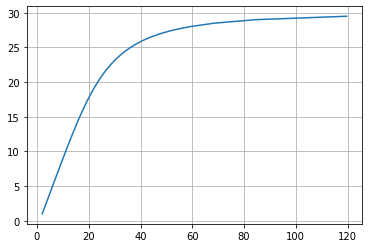

In [159]:
plt.plot(s_eq,v_eq)
plt.grid()

In [167]:
a=idm_params[0]
b=idm_params[1]
V0=idm_params[2]
delta=idm_params[3]
T=idm_params[4]
s0=idm_params[5]

s_eq_vals = np.zeros_like(v_range)

for i in range(len(v_range)):
    v = v_range[i]
    s_eq = IDM_S_eq(idm_params,v)
    s_eq_vals[i] = s_eq

s = s_eq_vals
v = v_range

# finite difference derivative:
ep = 1e-6
da_ds = (IDM_Accel(idm_params,s+ep,0,v)-IDM_Accel(idm_params,s-ep,0,v))/(2*ep)
da_dds = (IDM_Accel(idm_params,s,ep,v)-IDM_Accel(idm_params,s,-ep,v))/(2*ep)
da_dv = (IDM_Accel(idm_params,s,0,v+ep)-IDM_Accel(idm_params,s,0,v-ep))/(2*ep)

alpha1 = da_ds
alpha2 = da_dds-da_dv
alpha3 = da_dds

stab = np.square(alpha2)-np.square(alpha3)-2*alpha1

is_stable = stab > 0

(-0.2, 1.6)

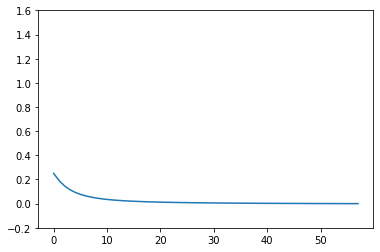

In [169]:
# plt.plot(da_ds)
plt.plot(a*2*T*np.divide((v),np.power(s,3)))
plt.ylim([-0.2,1.6])

(-0.2, 1.6)

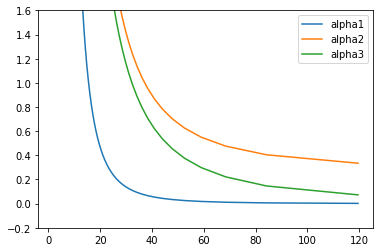

In [160]:
plt.plot(s,alpha1)
plt.plot(s,alpha2)
plt.plot(s,alpha3)
plt.legend(['alpha1','alpha2','alpha3'])
plt.ylim([-.2,1.6])